## Image Classification using CNN and Tensorflow | Deep Learning

__Description : Classification of a given image into its class using Convolutional Neural Network and tensorflow - _Deep Learning approach___

__Python libraries used :__
    1. Tensorflow
    2. Keras
    3. Numpy
    4. Matplotlib

Import tensorflow, keras, numpy and matplotlib

In [51]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

#check the version of tensorflow
tf.__version__

'2.0.0'

Load CIFAR10 dataset from keras.datasets

In [52]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Data Analysis

Let us inspect the shape and length of our train and test dataset.

In [53]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [54]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


CIFAR10 dataset is set of 60,000 images of 10 different classes like cat, dog, ship, horse etc. 50,000 training images and 10,000 test images with their corresponding labels. All digits are labelled as their values.

### Analizing a sample image and its pixels


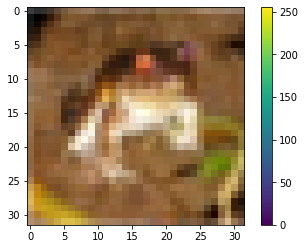

[6]


In [55]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

print(y_train[0])

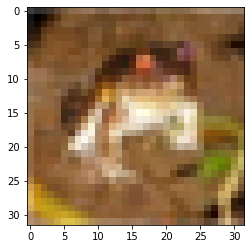

In [56]:
plt.imshow(x_train[0], cmap = plt.cm.gray_r, interpolation = 'nearest')

In [57]:
x_train[0].shape

(32, 32, 3)

Each image in this 60,000 images dataset has 1024 features with 32 x 32 pixels. Each pixel represents pixel intensity with value from 0 to 255.

### Visualizing first 20 Images from the Dataset with their labels

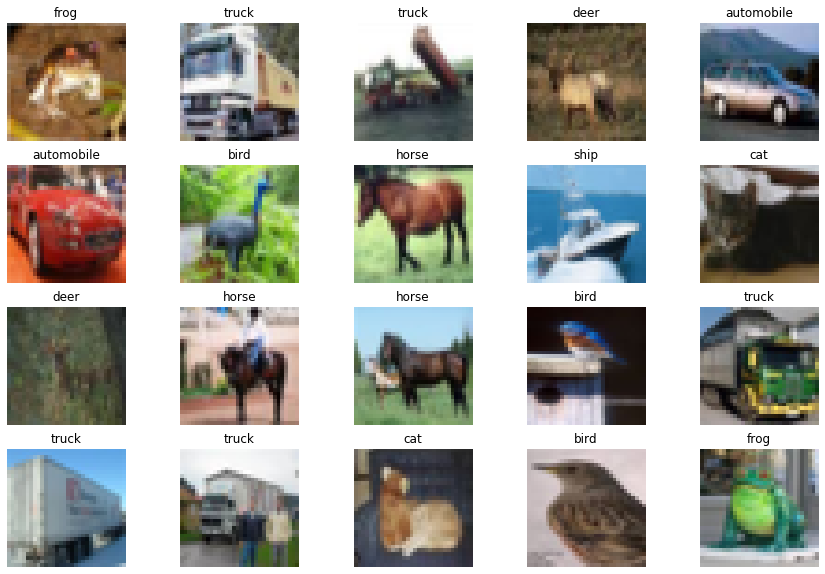

In [58]:
plt.figure(figsize = (15, 10))
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(0, 20):
    plt.subplot(4, 5, i + 1)
    plt.axis('off')
    plt.imshow(x_train[i], cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.title(number_to_class[y_train[i][0]])

We can vaguely recognize the images. Label assigned to each image referes to the index of class which it belongs to.

### Preparing data for training


In [59]:
# Converting into category out of 10 categories
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

## Convolutional Neural Network

### Building the model

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

#Creating Sequential model of Keras
model = Sequential()

# Adding first Convolutional layer and Maxpooking
model.add(Conv2D(32, (5, 5), activation = 'relu', input_shape =(32,32,3) ))
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding second Convolutional layer and Maxpooking
model.add(Conv2D(64, (5, 5), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convert input image to flat image of vector 32 x 32 = 1024
model.add(Flatten())

#Convolutional layer with input layer of neural network
model.add(Dense(1000, activation='relu'))

#Convolutional layer with output layer of neural network
model.add(Dense(10, activation='softmax')) # output layer softmax for probability distribution

### Compiling the Model

In [23]:
#Compiling the model with categorical crossentropy since we have multiple classes (10)
model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the Model


In [24]:
# Fitting the training data into CNN Model
model.fit(x_train, y_train, batch_size=256, validation_split= 0.3, epochs=10)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 32s 925us/step - loss: 1.6810 - accuracy: 0.3924 - val_loss: 1.4430 - val_accuracy: 0.4859
Epoch 2/10
35000/35000 [==============================] - 33s 945us/step - loss: 1.3076 - accuracy: 0.5337 - val_loss: 1.2259 - val_accuracy: 0.5663
Epoch 3/10
35000/35000 [==============================] - 36s 1ms/step - loss: 1.1592 - accuracy: 0.5865 - val_loss: 1.1352 - val_accuracy: 0.6037
Epoch 4/10
35000/35000 [==============================] - 36s 1ms/step - loss: 1.0530 - accuracy: 0.6295 - val_loss: 1.1441 - val_accuracy: 0.6003
Epoch 5/10
35000/35000 [==============================] - 34s 968us/step - loss: 0.9552 - accuracy: 0.6667 - val_loss: 1.0318 - val_accuracy: 0.6469
Epoch 6/10
35000/35000 [==============================] - 33s 933us/step - loss: 0.8651 - accuracy: 0.6981 - val_loss: 0.9963 - val_accuracy: 0.6555
Epoch 7/10
35000/35000 [==============================] - 32

### Calculating CNN Model Accuracy

In [26]:
model.evaluate(x_test, y_test)[1]


10000/10000 [==============================] - 2s 218us/step


0.6801000237464905

### Prediction on Test Images


Predicting the values of all test images and inspecting if prediction is correct

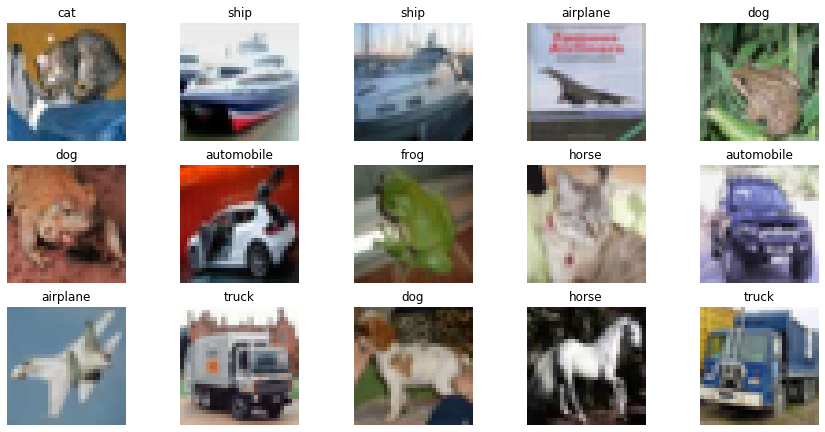

In [70]:
y_pred = model.predict(x_test)
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize = (15, 10))
for i in range(0, 15):
    plt.subplot(4, 5, i + 1)
    plt.axis('off')
    plt.imshow(x_test[i], cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.title(number_to_class[np.argmax(y_pred[i])])

Checking the probability distribution for any random image in multi-class classification

In [35]:
import random
test_index = random.randint(0, 9999)

print("Probability distribution for a multi-class classification of index : ", test_index)
y_pred[test_index]

Probability distribution for a multi-class classification of index :  4450


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [36]:
# Finding the value corresponding to the test_index by finding maximum probability out of 10 classes
print('The predicted value is : ', number_to_class[np.argmax(y_pred[test_index])])

The predicted value is :  airplane


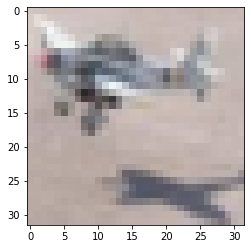

In [37]:
#Checking if the predicted value is correct
plt.imshow(x_test[test_index], cmap = plt.cm.binary)
plt.show()

Covolutional Neural Network Model is predicting the value correctly with random images.

## Predicting Random Image values with three SVM models


Define a function to display digit image along with its predicted value

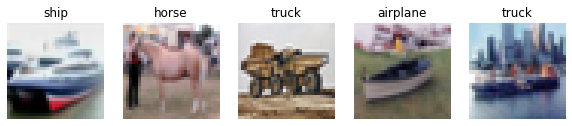

In [66]:
# Function to generate randome index values of specified length
def get_index_list(start, end, num): 
    index_list = [] 
    for i in range(num): 
        index_list.append(random.randint(start, end))   
    return index_list
  
# Displaying image and its predicted value
image_index = get_index_list(0, 300, 5)
plt.figure(figsize = (10, 10))
for i in range(len(image_index)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[image_index[i]], cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.axis('off')
    plt.title(number_to_class[np.argmax(y_pred[image_index[i]])])


Above cell can be run again and again to see different random image result every time.

### Recognizing random image downloaded from internet

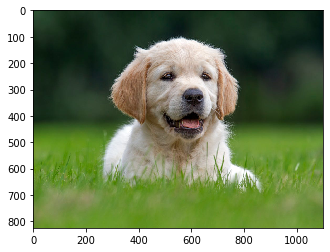

In [77]:
laptop_image = plt.imread('unknown image.jpg')
img = plt.imshow(laptop_image)


Image can have any size and shape. However, this CNN model is trained to predict image of a specific shape and we have to resize the input image before feeding it to the CNN Model.

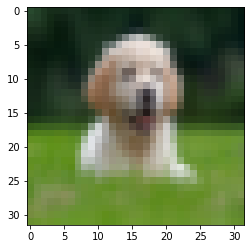

In [78]:
# Resizing image before feeding to the model
from skimage.transform import resize
resized_image = resize(laptop_image, (32,32,3)) 
img = plt.imshow(resized_image) 

In [79]:
import numpy as np
probabilities = model.predict(np.array( [resized_image,] ))
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])


Most likely class: dog -- Probability: 0.9567954


## Result

Convolutonal Neural Network recognized image with confidence of 95.67 %. Project can be further implemented to recognize live objects with webcam.